# Meat consumption map per capita

The following project was made using the pandas and folium library tools. It uses the basic functions of data manipulation and visualization. The database used is at the following [location](https://en.wikipedia.org/wiki/List_of_countries_by_meat_consumption) and contains annual data on world meat consumption.

### At first let's import all python libraries that will be necessary in our project. There are two of them: pandas & folium. 

In [1]:
import pandas as pd
import folium

Next thing is importing a data. In this case I will do it straignt from wikipedia using read.html() pandas function. We are using df=df[0] to tell python that we need the first table available on website. 

In [2]:
url= 'https://en.wikipedia.org/wiki/List_of_countries_by_meat_consumption'
df=pd.read_html(url)
df=df[0]

### Okay. Let's look at our raw data and think how we can clean it a little bit:

In [3]:
df.head(5)

,Country,kg/person (2002)[9][note 1],kg/person (2009)[10],kg/person (2017) [11],kg/person (2017)[12]
0,Albania,38.2,44.1,41.78,NaN
1,Algeria,18.4,19.5,20.32,NaN
2,American Samoa,24.9,26.8,NaN,NaN
3,Angola,25.0,22.4,23.43,NaN
4,Antigua and Barbuda,56.0,84.3,74.56,NaN


To avoid any errors at first let's get rid of NA values from table. We will need only two columns: 'Country' & 'kg/person (2017) [11]', so we are adding them to our dataframe without the unncessary ones, and changing the second column name to something more friendly. 

In [4]:
df=df.dropna(subset=['kg/person (2017) [11]'])
df=df[['Country','kg/person (2017) [11]']]
df=df.rename(columns={'kg/person (2017) [11]':'Meat consumption - kg/person'})

When trying to change a variable types I've received an error that it's unable to set '32[15]' value into float. I've checked our data and found out that incorrect value belongs to Spain. We need to correct it as below and then change variables types.

In [5]:
df['Meat consumption - kg/person'] = df['Meat consumption - kg/person'].replace(['32[15]'],'32')
df = df.astype({"Country": str , "Meat consumption - kg/person": float })

### Let's see how our trimmed table is looking right now:

In [6]:
df.head(5)

,Country,Meat consumption - kg/person
0,Albania,41.78
1,Algeria,20.32
3,Angola,23.43
4,Antigua and Barbuda,74.56
5,Argentina,112.17


Okey now it's much cleaner and contains only necessary values. Next thing we need to do is obtain access to GeoJson file. There are two ways to do it: create a new customized file using some online generator f.ex. https://geojson-maps.ash.ms/ , or get an existing one from below link which I will do this time. 

In [7]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
geojson_url = f'{url}/world-countries.json'

We can open following json file in our browser to get acquainted with file syntax. To do it in the commmand prompt we will need to create python request as below, but as I said it's not necessary step:

In [ ]:
import requests
response=requests.get(geojson_url)
geojson=response.json()
geojson

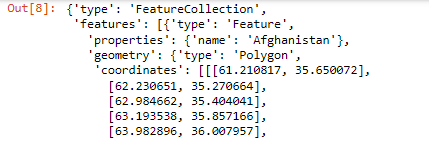

This is a few lines of created json. GeoJson file is crucial bc we will need it to connect our database by key_on argument, with a map that we will create in next step. 

In [9]:
m= folium.Map(location=[30,0], zoom_start=2)

### Okay we created a map but it doesn't contains any data to display. It's just an empty map. Let's use folium.Choropleth() function to add data from our df table created bf. 

In [ ]:
folium.Choropleth(
    geo_data = geojson_url,
    name ="choropleth",                  
    data = df,                     
    columns = ["Country", "Meat consumption - kg/person"],
    key_on="feature.properties.name",
    fill_color ="YlOrRd",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Meat consumption in kg per person",

).add_to(m)
m

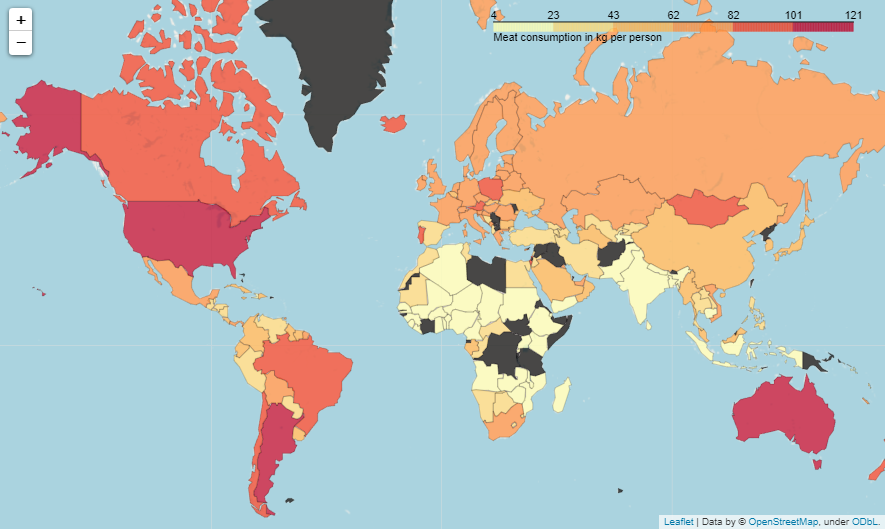

This is how our map is looking right now. As we can see the highest meat consumption includes countries like USA, Australia and South Latin American Countries. The meat consumption there is between 101 and 121 kg's per capita. Then we have Canada, Poland, Mongolia, Austria, Iceland, New Zealand, Brazil & Chile with consumption in a range of 82-101 kg's per capita. Third place belongs to the countries highlited by dark orange color so among others : Russia, Kazakhstan, Baltic countries and some of Europian countries. The lowest meat consumption we can observe in Africa and South Asia. The blacked areas were not taken due to lack of data. In a future I'm going to expand this project adding some heart diseases data and create correlation model between heart diseases and meat consumption. 

Project has been created by the help of Youtube tutorial video, which I would like to mention: https://www.youtube.com/watch?v=uWvLida5wcM&t=910s

### It's everything for now. Thank You for Your time and feel free to see my other projects on Github.